In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [2]:
# Load dataset
test_df = pd.read_csv("test_data.csv")

#Load output of the models
lstm_df = pd.read_csv("LSTM_Output.csv")
gbdt_df = pd.read_csv("GBDT_Output.csv")
transformer_df = pd.read_csv("Transformer_Output.csv")
hybrid_df = pd.read_csv("Hybrid_Output.csv")

In [3]:
lstm_pred = lstm_df['0']
gbdt_pred = gbdt_df['0']
transformer_pred = transformer_df['0']
hybrid_pred = hybrid_df['0']

y_actual = test_df['Patv']
y_temp = y_actual

In [4]:
al = np.array(lstm_pred)
at = np.array(transformer_pred)
lstm_output = np.append([55.13,55.13,55.13,55.13,55.13,55.13],al)
transformer_output = np.append([55.13,55.13,55.13,55.13,55.13,55.13,55.13,55.13,55.13,55.13],at)
gdbt_output = np.array(gbdt_pred)
hybrid_output = np.array(hybrid_pred)
y_actual = np.array(y_actual)

In [5]:
# Calculate the weighted average
weighted_average = (0.3*transformer_output + 0.35*lstm_output + 0.35*gdbt_output)

Ensembled Model RMSE Error =  81.34334698875988
Ensembled Model MAE Error =  48.379679309220386


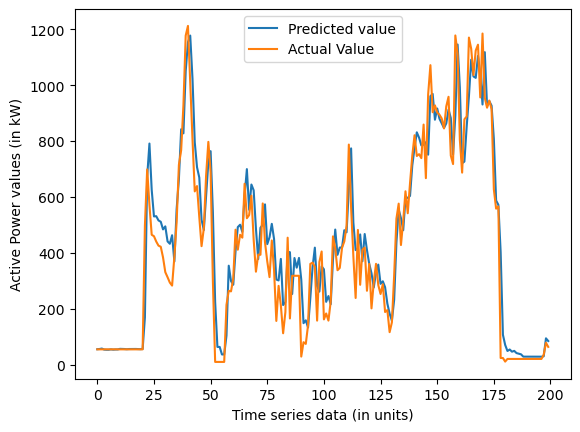

In [6]:
df = pd.DataFrame(data={'Predictions':weighted_average, 'Actuals':y_actual})
plt.plot(df['Predictions'][0:200],label="Predicted value")
plt.plot(df['Actuals'][0:200],label="Actual Value")
plt.xlabel("Time series data (in units)")
plt.ylabel("Active Power values (in kW)")
plt.legend()

print("Ensembled Model RMSE Error = ",np.sqrt(mse(weighted_average,y_actual)))
print("Ensembled Model MAE Error = ",mae(weighted_average,y_actual))


LSTM Model RMSE Error =  105.23390055828698
LSTM Model MAE Error =  59.03372815445377


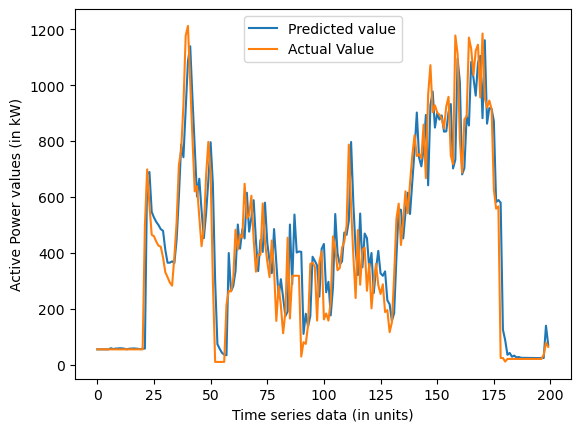

In [7]:
df = pd.DataFrame(data={'Predictions':lstm_output, 'Actuals':y_actual})
plt.plot(df['Predictions'][0:200],label="Predicted value")
plt.plot(df['Actuals'][0:200],label="Actual Value")
plt.xlabel("Time series data (in units)")
plt.ylabel("Active Power values (in kW)")
plt.legend()

print("LSTM Model RMSE Error = ",np.sqrt(mse(lstm_output,y_actual)))
print("LSTM Model MAE Error = ",mae(lstm_output,y_actual))

GBDT Model RMSE Error =  96.07237414417159
GBDT Model MAE Error =  57.655388849863606


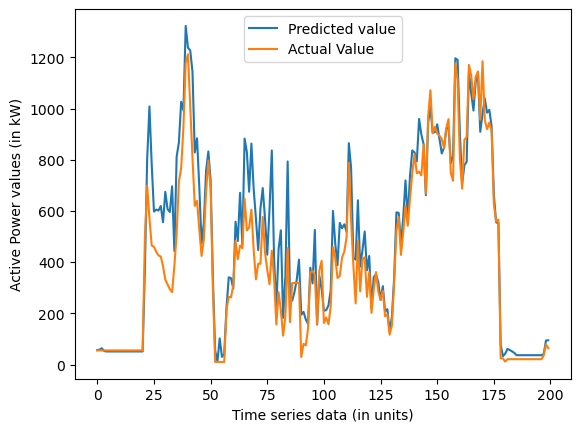

In [8]:
df = pd.DataFrame(data={'Predictions':gdbt_output, 'Actuals':y_actual})
plt.plot(df['Predictions'][0:200],label="Predicted value")
plt.plot(df['Actuals'][0:200],label="Actual Value")
plt.xlabel("Time series data (in units)")
plt.ylabel("Active Power values (in kW)")
plt.legend()

print("GBDT Model RMSE Error = ",np.sqrt(mse(gdbt_output,y_actual)))
print("GBDT Model MAE Error = ",mae(gdbt_output,y_actual))

Transformer Model RMSE Error =  108.56116046962416
Transformer Model MAE Error =  59.57355604286707


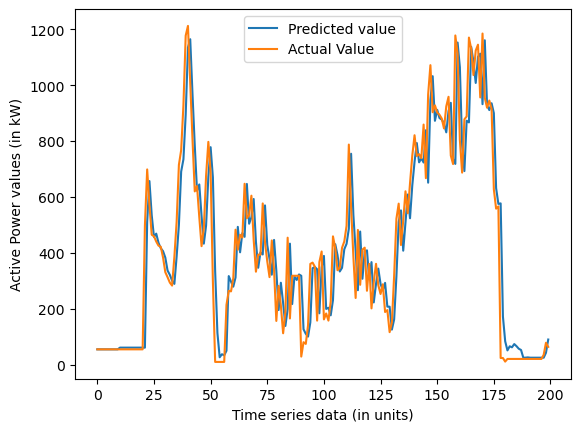

In [9]:
df = pd.DataFrame(data={'Predictions':transformer_output, 'Actuals':y_actual})
plt.plot(df['Predictions'][0:200],label="Predicted value")
plt.plot(df['Actuals'][0:200],label="Actual Value")
plt.xlabel("Time series data (in units)")
plt.ylabel("Active Power values (in kW)")
plt.legend()

print("Transformer Model RMSE Error = ",np.sqrt(mse(transformer_output,y_actual)))
print("Transformer Model MAE Error = ",mae(transformer_output,y_actual))

Hybrid Model RMSE Error =  106.48196640553735
Hybrid Model MAE Error =  62.4083992062499


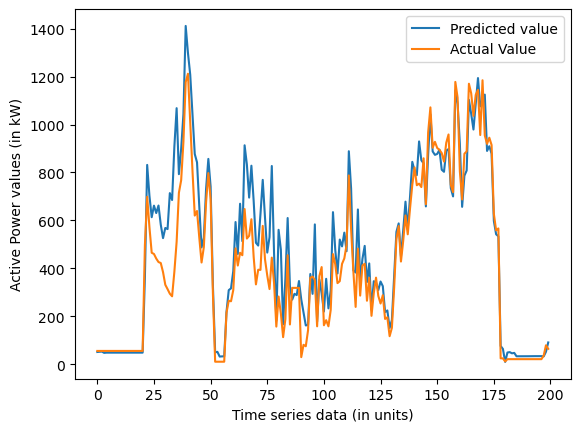

In [10]:
df = pd.DataFrame(data={'Predictions':hybrid_output, 'Actuals':y_actual})
plt.plot(df['Predictions'][0:200],label="Predicted value")
plt.plot(df['Actuals'][0:200],label="Actual Value")
plt.xlabel("Time series data (in units)")
plt.ylabel("Active Power values (in kW)")
plt.legend()

print("Hybrid Model RMSE Error = ",np.sqrt(mse(hybrid_output,y_actual)))
print("Hybrid Model MAE Error = ",mae(hybrid_output,y_actual))

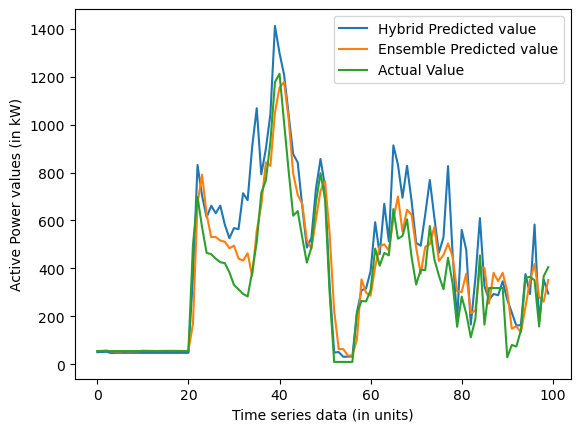

In [11]:
df = pd.DataFrame(data={'Hybrid_Predictions':hybrid_output,'Ensemble_Predictions':weighted_average, 'Actuals':y_actual})
plt.plot(df['Hybrid_Predictions'][0:100],label="Hybrid Predicted value")
plt.plot(df['Ensemble_Predictions'][0:100],label="Ensemble Predicted value")
plt.plot(df['Actuals'][0:100],label="Actual Value")
plt.xlabel("Time series data (in units)")
plt.ylabel("Active Power values (in kW)")
plt.legend()

In [12]:
predictions = np.zeros((3, transformer_output.size))
predictions[0]=lstm_output
predictions[1]=gdbt_output
predictions[2]=transformer_output
acc_predictions = np.zeros(transformer_output.size)

for i in range(transformer_output.size):
    diff_lstm = abs(y_actual[i]-lstm_output[i])
    diff_gbdt = abs(y_actual[i]-gdbt_output[i])
    diff_transformer = abs(y_actual[i]-transformer_output[i])
    diff = np.array([diff_lstm,diff_gbdt,diff_transformer])
    min_index = np.argmin(diff)
    acc_predictions[i] = predictions[min_index][i]
    
print(acc_predictions)

[  55.13      55.13      55.13    ... 1015.58075 1072.8855  1114.145  ]


Ensembled Model RMSE Error =  46.861284392515984
Ensembled Model MAE Error =  25.74351418389727


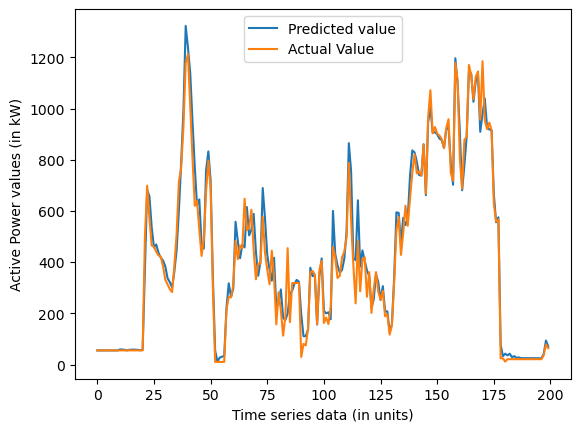

In [13]:
df = pd.DataFrame(data={'Predictions':acc_predictions, 'Actuals':y_actual})
plt.plot(df['Predictions'][0:200],label="Predicted value")
plt.plot(df['Actuals'][0:200],label="Actual Value")
plt.xlabel("Time series data (in units)")
plt.ylabel("Active Power values (in kW)")
plt.legend()

print("Ensembled Model RMSE Error = ",np.sqrt(mse(acc_predictions,y_actual)))
print("Ensembled Model MAE Error = ",mae(acc_predictions,y_actual))

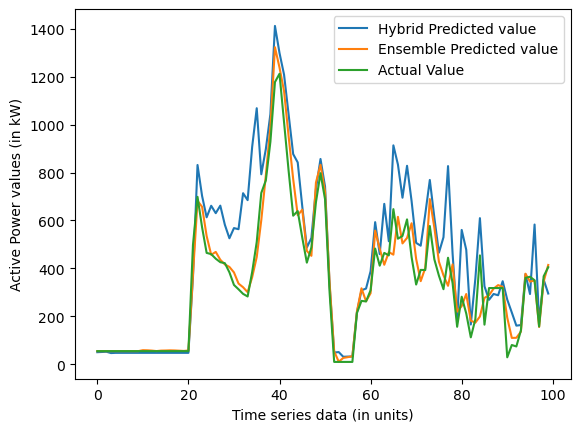

In [14]:
df = pd.DataFrame(data={'Hybrid_Predictions':hybrid_output,'Ensemble_Predictions':acc_predictions, 'Actuals':y_actual})
plt.plot(df['Hybrid_Predictions'][0:100],label="Hybrid Predicted value")
plt.plot(df['Ensemble_Predictions'][0:100],label="Ensemble Predicted value")
plt.plot(df['Actuals'][0:100],label="Actual Value")
plt.xlabel("Time series data (in units)")
plt.ylabel("Active Power values (in kW)")
plt.legend()